# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
        

In [11]:
# List for holding reponse information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for idx, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | pierre
Processing Record 2 of Set 1 | salalah
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | kununurra
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | seybaplaya
Processing Record 7 of Set 1 | mwandiga
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | vostok
Processing Record 11 of Set 1 | kingman
Processing Record 12 of Set 1 | tabuk
Processing Record 13 of Set 1 | mirnyy
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | kousseri
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | acapulco
Processing Record 18 of Set 1 | nguiu
City not found. Skipping...
Processing Record 19 of Set 1 | tatawin
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | albany
Processing Record 22 of S

City not found. Skipping...
Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | nanortalik
Processing Record 40 of Set 4 | sabang
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | kitimat
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | komsomolskiy
Processing Record 45 of Set 4 | ubauro
Processing Record 46 of Set 4 | chapleau
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | mayo
Processing Record 50 of Set 4 | bhinga
Processing Record 1 of Set 5 | ola
Processing Record 2 of Set 5 | kattivakkam
Processing Record 3 of Set 5 | puerto baquerizo moreno
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | chumikan
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 5 | helong
Processing Record 9 of Set 5 | honiara
Processin

Processing Record 29 of Set 8 | the valley
Processing Record 30 of Set 8 | provideniya
Processing Record 31 of Set 8 | grenada
Processing Record 32 of Set 8 | dax
Processing Record 33 of Set 8 | bada
Processing Record 34 of Set 8 | rorvik
Processing Record 35 of Set 8 | bang rakam
Processing Record 36 of Set 8 | craig
Processing Record 37 of Set 8 | la primavera
Processing Record 38 of Set 8 | qasigiannguit
Processing Record 39 of Set 8 | artigas
Processing Record 40 of Set 8 | lagoa
Processing Record 41 of Set 8 | adrar
Processing Record 42 of Set 8 | mecca
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | homer
Processing Record 45 of Set 8 | witu
Processing Record 46 of Set 8 | jacareacanga
Processing Record 47 of Set 8 | hauterive
Processing Record 48 of Set 8 | kachug
Processing Record 49 of Set 8 | nerchinsk
Processing Record 50 of Set 8 | zyryanka
Processing Record 1 of Set 9 | sumbawa
City not found. Skipping...
Processing Record 2 of Set 9 | evensk
Proc

Processing Record 21 of Set 12 | prince rupert
Processing Record 22 of Set 12 | eureka
Processing Record 23 of Set 12 | taksimo
Processing Record 24 of Set 12 | perevolotskiy
Processing Record 25 of Set 12 | meulaboh
Processing Record 26 of Set 12 | hami
Processing Record 27 of Set 12 | tiarei
Processing Record 28 of Set 12 | borama
City not found. Skipping...
Processing Record 29 of Set 12 | doha
Processing Record 30 of Set 12 | kachikau
City not found. Skipping...
Processing Record 31 of Set 12 | tongzi
Processing Record 32 of Set 12 | paka
Processing Record 33 of Set 12 | fenoarivo
Processing Record 34 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 35 of Set 12 | la huerta
Processing Record 36 of Set 12 | murree
Processing Record 37 of Set 12 | mehran
Processing Record 38 of Set 12 | yamada
Processing Record 39 of Set 12 | clemencia
Processing Record 40 of Set 12 | clones
Processing Record 41 of Set 12 | san luis
Processing Record 42 of Set 12 | nuuk
Processing 

In [32]:
# Length of Latitude and Temprature

len(lat)
len(temp)

620

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          577
Lat           577
lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64


In [34]:
# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pierre,44.37,-100.35,77.00,47.0,40.0,13.87,US,1.592704e+09
1,salalah,17.02,54.09,82.40,88.0,75.0,4.70,OM,1.592704e+09
2,kununurra,-15.77,128.73,84.20,30.0,31.0,13.87,AU,1.592704e+09
3,upernavik,72.79,-56.15,39.76,73.0,0.0,8.52,GL,1.592704e+09
4,seybaplaya,19.65,-90.67,86.00,84.0,40.0,11.41,MX,1.592704e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
This section is skiped Because no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

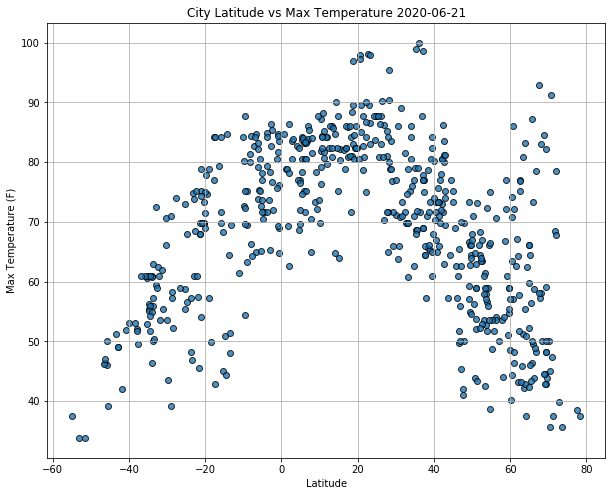

In [75]:
date_time = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature {date_time}")
plt.grid()
plt.savefig("./output_data/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()


## Latitude vs. Humidity Plot

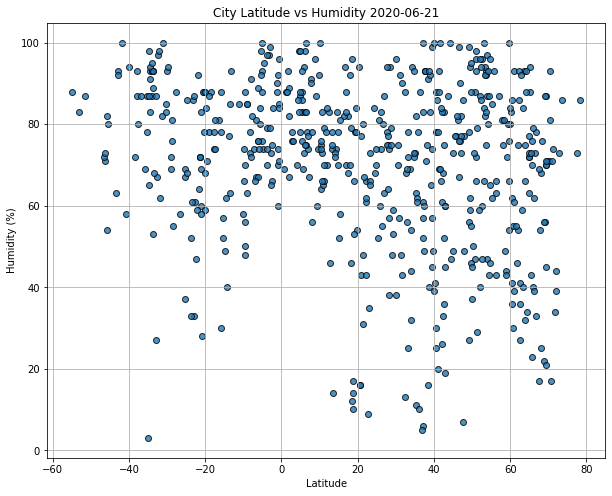

In [79]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()


## Latitude vs. Cloudiness Plot

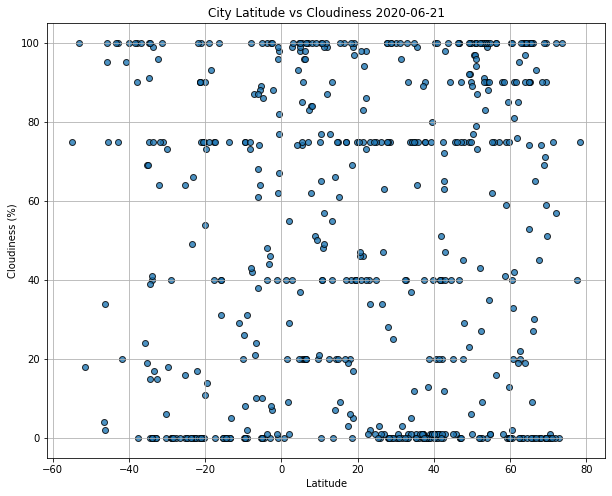

In [80]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

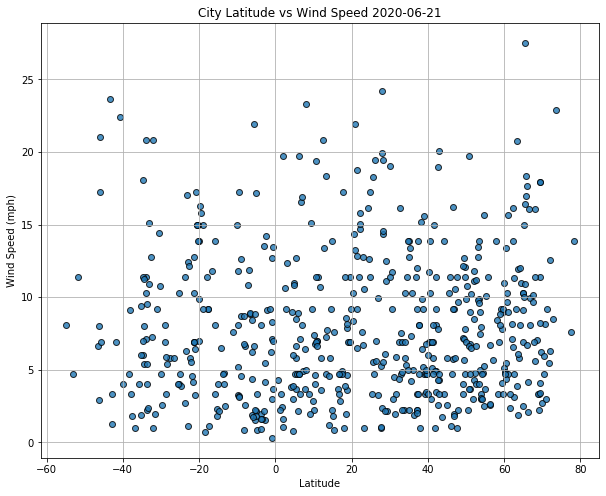

In [81]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date_time}')
plt.grid()
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [62]:
# OPTIONAL: Create a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [63]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4615325779966677
The correlation between both factors is -0.68


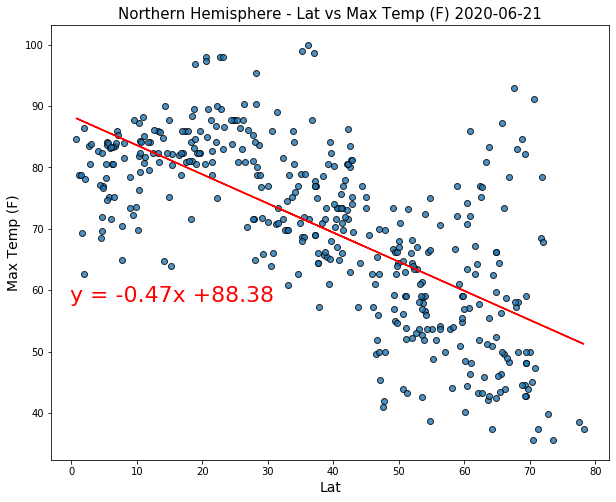

In [66]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.0031985409851605123
The correlation between both factors is -0.06


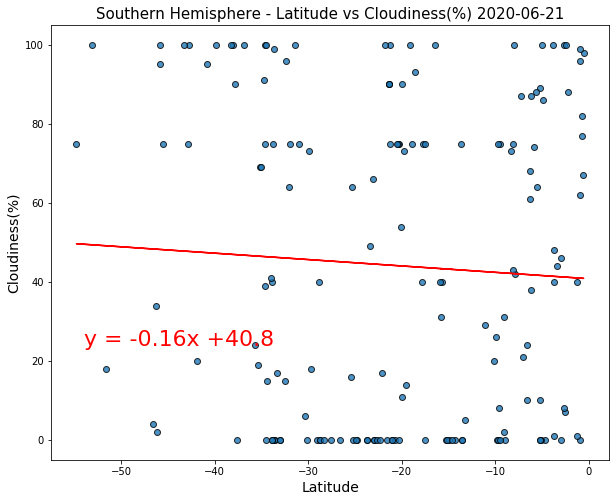

In [67]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("./output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.018597503353628204
The correlation between both factors is -0.14


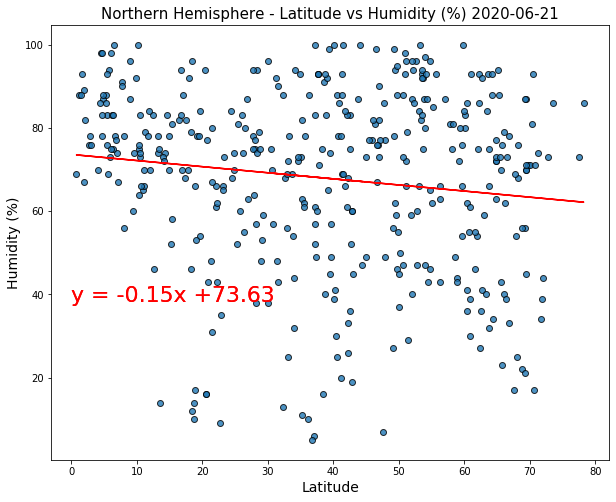

In [68]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("./output_data/Northern_Hemisphere_Humidity _Latitude_Linear", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02202604977155477
The correlation between both factors is -0.15


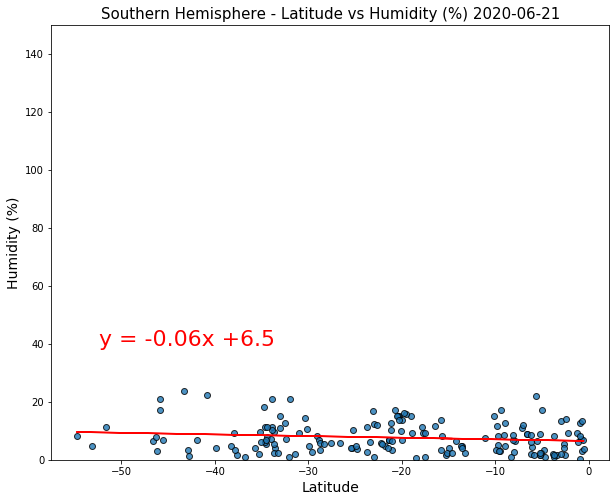

In [74]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Lat']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("./output_data/southern_humudity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00100632534330402
The correlation between both factors is -0.03


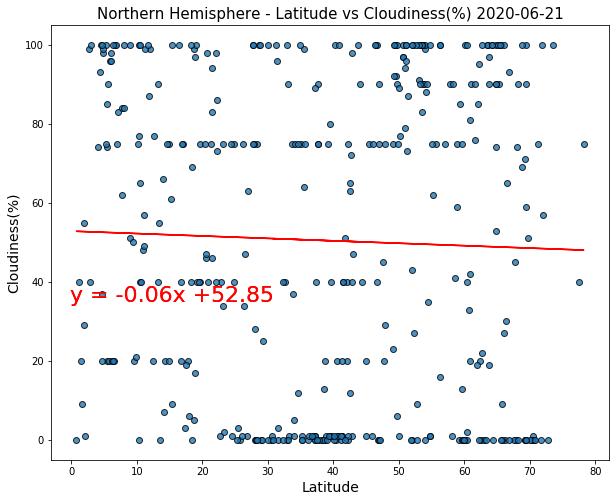

In [70]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("./output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0031985409851605123
The correlation between both factors is -0.06


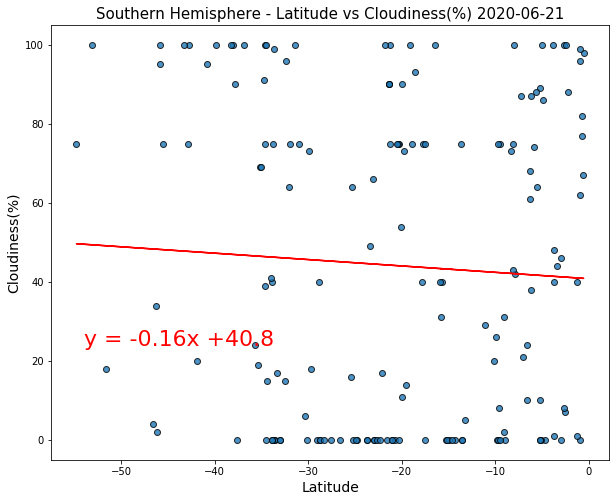

In [71]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0022872882474856845
The correlation between both factors is 0.05


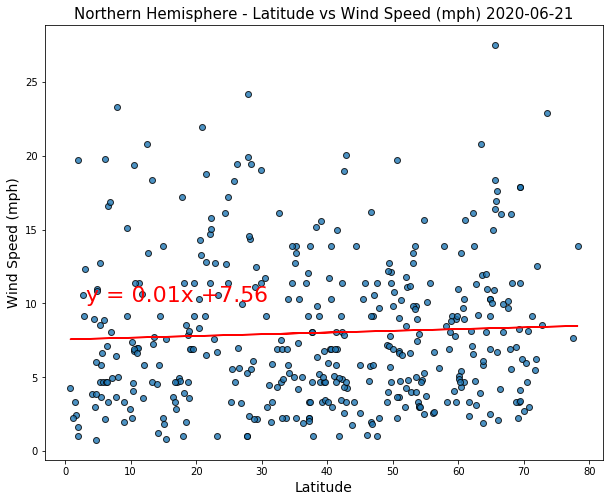

In [72]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02202604977155477
The correlation between both factors is -0.15


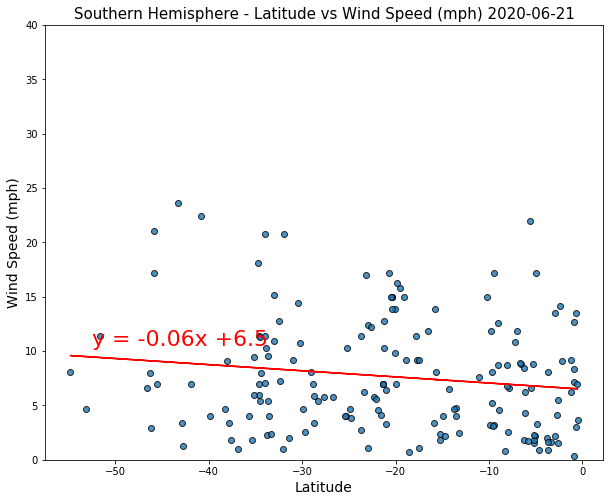

In [73]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Lat']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()
